# Homework 2

## FINM 36700 - 2024

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

## HBS Case

### *ProShares Hedge Replication ETF*

***

# 1. The ProShares ETF Product

**Section 1 is not graded**, and you do not need to submit your answers. But you are encouraged to think about them, and we will discuss them.

## 1. Alternative ETFs

Describe the two types of investments referenced by this term.

## 2. Hedge Funds.

a. Using just the information in the case, what are two measures by which hedge funds are an attractive investment?

b. What are the main benefits of investing in hedge funds via an ETF instead of directly?

## 3. The Benchmarks

a. Explain as simply as possible how HFRI, MLFM, MLFM-ES, and HDG differ in their construction and purpose.

b. How well does the Merrill Lynch Factor Model (MLFM) track the HFRI?

c. In which factor does the MLFM have the largest loading? (See a slide in Exhibit 1.)

d. What are the main concerns you have for how the MLFM attempts to replicate the HFRI?

## 4. The HDG Product

a. What does ProShares ETF, HDG, attempt to track? Is the tracking error small?

b. HDG is, by construction, delivering beta for investors. Isn't the point of hedge funds to generate alpha? Then why would HDG be valuable?

c. The fees of a typical hedge-fund are 2% on total assets plus 20% of excess returns if positive. HDG's expense ratio is roughly 1% on total assets. What would their respective net Sharpe Ratios be, assuming both have a gross excess returns of 10% and volatility of 20%?

***

# 2.  Analyzing the Data

Use the data found on Canvas, in <b>'proshares analysis data.xlsx'</b>. 

It has monthly data on financial indexes and ETFs from `Aug 2011` through `Sep 2024`.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

/Users/rosalind/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## 1. 

For the series in the "hedge fund series" tab, report the following summary statistics:
* mean
* volatility
* Sharpe ratio

Annualize these statistics.

In [2]:
# Load the data
hf_series = pd.read_excel('proshares_analysis_data.xlsx', sheet_name='hedge_fund_series', index_col=0)
mer_factors = pd.read_excel('proshares_analysis_data.xlsx', sheet_name='merrill_factors', index_col=0) 

In [3]:
hf_series

,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
2011-08-31,-0.032149,-0.025588,-0.025689,-0.027036,-0.006489
2011-09-30,-0.038903,-0.032414,-0.032593,-0.032466,-0.022141
2011-10-31,0.026858,0.043593,0.043320,0.050531,0.025239
2011-11-30,-0.013453,-0.012142,-0.012431,-0.028608,-0.007964
2011-12-31,-0.004479,0.001938,0.001796,0.012875,0.001822
...,...,...,...,...,...
2024-05-31,0.014100,0.010610,0.010280,0.011225,0.013480
2024-06-30,-0.000300,0.001292,0.001114,-0.001986,0.003188
2024-07-31,0.012700,0.023803,0.023166,0.024381,0.011279
2024-08-31,0.002500,-0.000733,-0.000766,-0.002413,0.007648


In [4]:
# report summary statistics
def annualize_stats_return(series, annualized_factor=12):
    mean = series.mean() * annualized_factor
    std = series.std() * np.sqrt(annualized_factor)
    sharpe_ratio = mean / std
    return mean, std, sharpe_ratio

hf_series_stats = hf_series.apply(annualize_stats_return)
hf_series_stats.index = ['mean', 'volatility', 'sharpe_ratio']
hf_series_stats

,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
mean,0.048295,0.036286,0.034605,0.024812,0.025653
volatility,0.059476,0.056136,0.055980,0.058408,0.050009
sharpe_ratio,0.812004,0.646398,0.618172,0.424805,0.512971


In [5]:
def calc_return_metrics(data, as_df=False, adj=12):
    """
    Calculate return metrics for a DataFrame of assets.

    Args:
        data (pd.DataFrame): DataFrame of asset returns.
        as_df (bool, optional): Return a DF or a dict. Defaults to False (return a dict).
        adj (int, optional): Annualization. Defaults to 12.

    Returns:
        Union[dict, DataFrame]: Dict or DataFrame of return metrics.
    """
    summary = dict()
    summary["Annualized Return"] = data.mean() * adj
    summary["Annualized Volatility"] = data.std() * np.sqrt(adj)
    summary["Annualized Sharpe Ratio"] = (
        summary["Annualized Return"] / summary["Annualized Volatility"]
    )
    summary["Annualized Sortino Ratio"] = summary["Annualized Return"] / (
        data[data < 0].std() * np.sqrt(adj)
    )
    return pd.DataFrame(summary, index=data.columns) if as_df else summary

calc_return_metrics(hf_series, as_df=True, adj=12)

,Annualized Return,Annualized Volatility,Annualized Sharpe Ratio,Annualized Sortino Ratio
HFRIFWI Index,0.048295,0.059476,0.812004,0.982889
MLEIFCTR Index,0.036286,0.056136,0.646398,0.859019
MLEIFCTX Index,0.034605,0.055980,0.618172,0.825860
HDG US Equity,0.024812,0.058408,0.424805,0.568668
QAI US Equity,0.025653,0.050009,0.512971,0.728372


## 2.

For the series in the "hedge fund series" tab, calculate the following statistics related to tail-risk.
* Skewness
* Excess Kurtosis (in excess of 3)
* VaR (.05) - the fifth quantile of historic returns
* CVaR (.05) - the mean of the returns at or below the fifth quantile
* Maximum drawdown - include the dates of the max/min/recovery within the max drawdown period.

There is no need to annualize any of these statistics.

In [6]:
# report summary statistics related to tail-risk
def tail_risk(series, var=0.05):
    skewness = series.skew()
    excess_kurtosis = series.kurtosis()
    VaR = series.quantile(var)
    CVaR = series[series <= series.quantile(var)].mean()

    wealth_index = 1000 * (1 + series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks) / previous_peaks
    max_drawdown = drawdowns.min()

    return skewness, excess_kurtosis, VaR, CVaR, max_drawdown 

hf_series_tail_risk = hf_series.apply(tail_risk)
hf_series_tail_risk.index = ['skewness', 'excess_kurtosis', 'VaR', 'CVaR', 'max_drawdown']
hf_series_tail_risk

,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
skewness,-0.963318,-0.265394,-0.251279,-0.254201,-0.434775
excess_kurtosis,5.763074,1.631580,1.595863,1.759250,1.605934
VaR,-0.024293,-0.028189,-0.028095,-0.030932,-0.017895
CVaR,-0.037478,-0.035857,-0.035816,-0.037575,-0.032695
max_drawdown,-0.115473,-0.124302,-0.124388,-0.140720,-0.137716


In [7]:
def calc_risk_metrics(data, as_df=False, var=0.05):
    """
    Calculate risk metrics for a DataFrame of assets.

    Args:
        data (pd.DataFrame): DataFrame of asset returns.
        as_df (bool, optional): Return a DF or a dict. Defaults to False.
        adj (int, optional): Annualizatin. Defaults to 12.
        var (float, optional): VaR level. Defaults to 0.05.

    Returns:
        Union[dict, DataFrame]: Dict or DataFrame of risk metrics.
    """
    summary = dict()
    summary["Skewness"] = data.skew()
    summary["Excess Kurtosis"] = data.kurtosis()
    summary[f"VaR ({var})"] = data.quantile(var, axis=0)
    summary[f"CVaR ({var})"] = data[data <= data.quantile(var, axis=0)].mean()
    summary["Min"] = data.min()
    summary["Max"] = data.max()

    wealth_index = 1000 * (1 + data).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks) / previous_peaks

    summary["Max Drawdown"] = drawdowns.min()

    summary["Bottom"] = drawdowns.idxmin()
    summary["Peak"] = previous_peaks.idxmax()

    recovery_date = []
    for col in wealth_index.columns:
        prev_max = previous_peaks[col][: drawdowns[col].idxmin()].max()
        recovery_wealth = pd.DataFrame([wealth_index[col][drawdowns[col].idxmin() :]]).T
        recovery_date.append(
            recovery_wealth[recovery_wealth[col] >= prev_max].index.min()
        )
    summary["Recovery"] = ["-" if pd.isnull(i) else i for i in recovery_date]

    summary["Duration (days)"] = [
        (i - j).days if i != "-" else "-"
        for i, j in zip(summary["Recovery"], summary["Bottom"])
    ]

    return pd.DataFrame(summary, index=data.columns) if as_df else summary

calc_risk_metrics(hf_series, as_df=True, var=0.05)

,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05),Min,Max,Max Drawdown,Bottom,Peak,Recovery,Duration (days)
HFRIFWI Index,-0.963318,5.763074,-0.024293,-0.037478,-0.090784,0.058602,-0.115473,2020-03-31,2024-09-30,2020-08-31,153
MLEIFCTR Index,-0.265394,1.631580,-0.028189,-0.035857,-0.053234,0.058886,-0.124302,2022-09-30,2024-09-30,2024-02-29,517
MLEIFCTX Index,-0.251279,1.595863,-0.028095,-0.035816,-0.052384,0.058805,-0.124388,2022-09-30,2024-09-30,2024-02-29,517
HDG US Equity,-0.254201,1.759250,-0.030932,-0.037575,-0.059183,0.058305,-0.140720,2022-09-30,2024-09-30,2024-07-31,670
QAI US Equity,-0.434775,1.605934,-0.017895,-0.032695,-0.056347,0.039787,-0.137716,2022-09-30,2024-09-30,2024-02-29,517


## 3. 

For the series in the "hedge fund series" tab, run a regression of each against SPY (found in the "merrill factors" tab.) Include an intercept. Report the following regression-based statistics:
* Market Beta
* Treynor Ratio
* Information ratio

Annualize these three statistics as appropriate.

In [8]:
spy = mer_factors[["SPY US Equity"]]

def calc_iterative_regression(y, X, intercept=True, one_to_many=False, adj=12):
    """
    Iterative regression for checking one X column against many different y columns,
    or vice versa. "one_to_many=True" means that we are checking one X column against many
    y columns, and "one_to_many=False" means that we are checking many X columns against a
    single y column.

    To enforce dynamic behavior in terms of regressors and regressands, we
    check that BOTH X and y are DataFrames

    Args:
        y : Target variable(s)
        X : Independent variable(s)
        intercept (bool, optional): Defaults to True.
        one_to_many (bool, optional): Which way to run the regression. Defaults to False.
        adj (int, optional): Annualization. Defaults to 12.

    Returns:
        DataFrame : Summary of regression results.
    """

    if not isinstance(X, pd.DataFrame) or not isinstance(y, pd.DataFrame):
        raise TypeError("X and y must both be DataFrames.")

    if one_to_many:
        if isinstance(X, pd.Series) or X.shape[1] > 1:
            summary = pd.concat(
                [
                    calc_multivariate_regression(y[col], X, intercept, adj)
                    for col in y.columns
                ],
                axis=0,
            )
        else:
            summary = pd.concat(
                [
                    calc_univariate_regression(y[col], X, intercept, adj)
                    for col in y.columns
                ],
                axis=0,
            )
        summary.index = y.columns
        return summary
    else:
        summary = pd.concat(
            [
                calc_univariate_regression(y, X[col], intercept, adj)
                for col in X.columns
            ],
            axis=0,
        )
        summary.index = X.columns
        return summary
    
def calc_univariate_regression(y, X, intercept=True, adj=12):
    """
    Calculate a univariate regression of y on X. Note that both X and y
    need to be one-dimensional.

    Args:
        y : target variable
        X : independent variable
        intercept (bool, optional): Fit the regression with an intercept or not. Defaults to True.
        adj (int, optional): What to adjust the returns by. Defaults to 12.

    Returns:
        DataFrame: Summary of regression results
    """
    X_down = X[y < 0]
    y_down = y[y < 0]
    if intercept:
        X = sm.add_constant(X)
        X_down = sm.add_constant(X_down)

    model = sm.OLS(y, X, missing="drop")
    results = model.fit()

    inter = results.params.iloc[0] if intercept else 0
    beta = results.params.iloc[1] if intercept else results.params.iloc[0]

    summary = dict()

    summary["Alpha"] = inter * adj
    summary["Beta"] = beta

    down_mod = sm.OLS(y_down, X_down, missing="drop").fit()
    summary["Downside Beta"] = down_mod.params.iloc[1] if intercept else down_mod.params.iloc[0]

    summary["R-Squared"] = results.rsquared
    summary["Treynor Ratio"] = (y.mean() / beta) * adj
    summary["Information Ratio"] = (inter / results.resid.std()) * np.sqrt(adj)
    summary["Tracking Error"] = (
        inter / summary["Information Ratio"]
        if intercept
        else results.resid.std() * np.sqrt(adj)
    )
    
    if isinstance(y, pd.Series):
        return pd.DataFrame(summary, index=[y.name])
    else:
        return pd.DataFrame(summary, index=y.columns)

def calc_multivariate_regression(y, X, intercept=True, adj=12):
    """
    Calculate a multivariate regression of y on X. Adds useful metrics such
    as the Information Ratio and Tracking Error. Note that we can't calculate
    Treynor Ratio or Downside Beta here.

    Args:
        y : target variable
        X : independent variables
        intercept (bool, optional): Defaults to True.
        adj (int, optional): Annualization factor. Defaults to 12.

    Returns:
        DataFrame: Summary of regression results
    """
    if intercept:
        X = sm.add_constant(X)

    model = sm.OLS(y, X, missing="drop")
    results = model.fit()
    summary = dict()

    inter = results.params.iloc[0] if intercept else 0
    betas = results.params.iloc[1:] if intercept else results.params

    summary["Alpha"] = inter * adj
    summary["R-Squared"] = results.rsquared

    X_cols = X.columns[1:] if intercept else X.columns

    for i, col in enumerate(X_cols):
        summary[f"{col} Beta"] = betas[i]

    summary["Information Ratio"] = (inter / results.resid.std()) * np.sqrt(adj)
    summary["Tracking Error"] = results.resid.std() * np.sqrt(adj)
    
    if isinstance(y, pd.Series):
        return pd.DataFrame(summary, index=[y.name])
    else:
        return pd.DataFrame(summary, index=y.columns)

calc_iterative_regression(hf_series, spy, one_to_many=True, adj=12)

,Alpha,Beta,Downside Beta,R-Squared,Treynor Ratio,Information Ratio,Tracking Error
HFRIFWI Index,-0.001145,0.346131,0.281127,0.711480,0.139528,-0.035836,0.002662
MLEIFCTR Index,-0.012761,0.343383,0.281044,0.786051,0.105672,-0.491479,0.002164
MLEIFCTX Index,-0.014269,0.342171,0.278994,0.784862,0.101134,-0.549547,0.002164
HDG US Equity,-0.025474,0.352053,0.269967,0.763208,0.070478,-0.896268,0.002368
QAI US Equity,-0.016965,0.298376,0.212696,0.747822,0.085976,-0.675558,0.002093


## 4. 

Discuss the previous statistics, and what they tell us about...

* the differences between SPY and the hedge-fund series?
* which performs better between HDG and QAI.
* whether HDG and the ML series capture the most notable properties of HFRI.

4.1 The hedge-fund series show lower beta and downside beta values compared to 1, which means the hedge funds are less sensitive to market movements. For the alphas, they are negative, which means these hedge funds have underperformed SPY. 

4.2 QAI has a higher Treynor Ratio and less negative Information Ratio, so QAI is better. 

4.3 The ML series and HDG have betas and downside betas similar to HFRIFWI Index, indicating they capture a similar level of market risk and protection from downside risks.

## 5. 

Report the correlation matrix for these assets.
* Show the correlations as a heat map.
* Which series have the highest and lowest correlations?

Text(0.5, 1.0, 'Correlation Matrix of Hedge Fund Series and SPY')

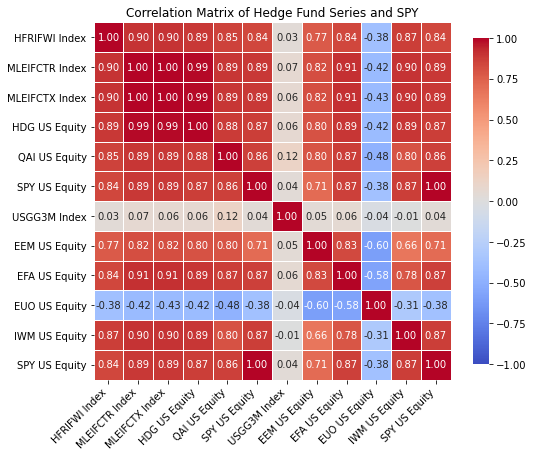

In [9]:
def plot_correlation_matrix(corrs, ax=None):
    if ax:
        sns.heatmap(
            corrs,
            annot=True,
            cmap="coolwarm",
            vmin=-1,
            vmax=1,
            linewidths=0.7,
            annot_kws={"size": 10},
            fmt=".2f",
            square=True,
            cbar_kws={"shrink": 0.75},
            ax=ax,
        )
    # Correlation helper function.
    else:
        ax = sns.heatmap(
            corrs,
            annot=True,
            cmap="coolwarm",
            vmin=-1,
            vmax=1,
            linewidths=0.7,
            annot_kws={"size": 10},
            fmt=".2f",
            square=True,
            cbar_kws={"shrink": 0.75},
        )

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")
    return ax


fig, ax = plt.subplots(figsize=(8, 8))
ax = plot_correlation_matrix(pd.concat([hf_series, mer_factors, spy], axis=1).corr(), ax=ax)
ax.set_title("Correlation Matrix of Hedge Fund Series and SPY")

In [10]:
# calculate the etf with the max and min correlation based on the correlation matrix 
def print_max_min_correlation(corrs):
    # Correlation helper function. Prints the min/max/absolute value
    # for the correlation matrix.
    corr_series = corrs.unstack()
    corr_series = corr_series[corr_series != 1]

    max_corr = corr_series.abs().agg(["idxmax", "max"]).T
    min_corr = corr_series.abs().agg(["idxmin", "min"]).T
    min_corr_raw = corr_series.agg(["idxmin", "min"]).T
    max_corr, max_corr_val = max_corr["idxmax"], max_corr["max"]
    min_corr, min_corr_val = min_corr["idxmin"], min_corr["min"]
    min_corr_raw, min_corr_raw_val = min_corr_raw["idxmin"], min_corr_raw["min"]

    print(
        f"Max Corr (by absolute value): {max_corr[0]} and {max_corr[1]} with a correlation of {max_corr_val:.2f}"
    )
    print(
        f"Min Corr (by absolute value): {min_corr[0]} and {min_corr[1]} with a correlation of {min_corr_val:.2f}"
    )
    print(
        f"Min Corr (raw): {min_corr_raw[0]} and {min_corr_raw[1]} with a correlation of {min_corr_raw_val:.2f}"
    )


print_max_min_correlation(pd.concat([hf_series, mer_factors, spy], axis=1).corr())

Max Corr (by absolute value): MLEIFCTR Index and MLEIFCTX Index with a correlation of 1.00
Min Corr (by absolute value): USGG3M Index and IWM US Equity with a correlation of 0.01
Min Corr (raw): EEM US Equity and EUO US Equity with a correlation of -0.60


## 6.

Replicate HFRI with the six factors listed on the "merrill factors" tab. Include a constant, and run the unrestricted regression,

$\newcommand{\hfri}{\text{hfri}}$
$\newcommand{\merr}{\text{merr}}$

$$\begin{align}
r^{\hfri}_{t} &= \alpha^{\merr} + x_{t}^{\merr}\beta^{\merr} + \epsilon_{t}^{\merr}\\[5pt]
\hat{r}^{\hfri}_{t} &= \hat{\alpha}^{\merr} + x_{t}^{\merr}\hat{\beta}^{\merr}
\end{align}$$

Note that the second equation is just our notation for the fitted replication.

a. Report the intercept and betas.
b. Are the betas realistic position sizes, or do they require huge long-short positions?
c. Report the R-squared.
d. Report the volatility of $\epsilon^{\merr}$, the tracking error.

In [11]:
def calc_multivariate_regression(y, X, intercept=True, adj=12):
    """
    Calculate a multivariate regression of y on X. Adds useful metrics such
    as the Information Ratio and Tracking Error. Note that we can't calculate
    Treynor Ratio or Downside Beta here.

    Args:
        y : target variable
        X : independent variables
        intercept (bool, optional): Defaults to True.
        adj (int, optional): Annualization factor. Defaults to 12.

    Returns:
        DataFrame: Summary of regression results
    """
    if intercept:
        X = sm.add_constant(X)

    model = sm.OLS(y, X, missing="drop")
    results = model.fit()
    summary = dict()

    inter = results.params.iloc[0] if intercept else 0
    betas = results.params.iloc[1:] if intercept else results.params

    summary["Alpha"] = inter * adj
    summary["R-Squared"] = results.rsquared

    X_cols = X.columns[1:] if intercept else X.columns

    for i, col in enumerate(X_cols):
        summary[f"{col} Beta"] = betas[i]

    summary["Information Ratio"] = (inter / results.resid.std()) * np.sqrt(adj)
    summary["Tracking Error"] = results.resid.std() * np.sqrt(adj)
    
    if isinstance(y, pd.Series):
        return pd.DataFrame(summary, index=[y.name])
    else:
        return pd.DataFrame(summary, index=y.columns)


with_int = calc_multivariate_regression(hf_series['HFRIFWI Index'], mer_factors).T
no_int = calc_multivariate_regression(hf_series['HFRIFWI Index'], mer_factors, intercept=False).T
regrs = pd.concat([with_int, no_int], axis=1)
regrs.columns = ["HFRI w/Intercept", "HFRI w/o Intercept"]
regrs

,HFRI w/Intercept,HFRI w/o Intercept
Alpha,0.014824,0.000000
R-Squared,0.839676,0.845162
SPY US Equity Beta,0.036483,0.050667
USGG3M Index Beta,0.146336,0.499336
EEM US Equity Beta,0.081611,0.080866
EFA US Equity Beta,0.084638,0.079146
EUO US Equity Beta,0.028806,0.031373
IWM US Equity Beta,0.145111,0.142651
Information Ratio,0.622478,0.000000
Tracking Error,0.023815,0.023908


## 7.

Let's examine the replication out-of-sample (OOS).

Starting with $t = 61$ month of the sample, do the following:

* Use the previous 60 months of data to estimate the regression equation. 
This gives time-t estimates of the regression parameters, $\tilde{\alpha}^{\merr}_{t}$ and $\tilde{\beta}^{\merr}_{t}$.

* Use the estimated regression parameters, along with the time-t regressor values, $x^{\merr}_{t}$, calculate the time-t replication value that is, with respect to the regression estimate, built "out-of-sample" (OOS).

$$\hat{r}^{\hfri}_{t} \equiv \tilde{\alpha}^{\merr} + (x_{t}^{\merr})'\tilde{\beta}^{\merr}$$

* Step forward to $t = 62$, and now use $t = 2$ through $t = 61$ for the estimation. Re-run the steps above, and continue this process throughout the data series. Thus, we are running a rolling, 60-month regression for each point-in-time.

How well does the out-of-sample replication perform with respect to the target?

OOS-R-Squared: 80.43%


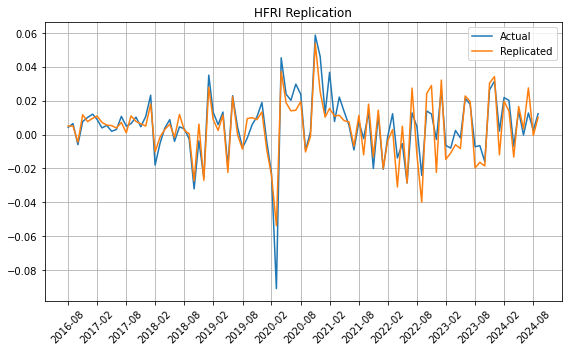

In [12]:
from collections import defaultdict

hfri = hf_series[["HFRIFWI Index"]].copy()

summary = defaultdict(list)

for idx in range(60, len(hfri), 1):
    # Get the data for ML factors and HFRI
    X = mer_factors.iloc[idx - 60 : idx].copy()
    y = hfri.iloc[idx - 60 : idx, 0].copy()

    oos_y = hfri.iloc[idx, 0]
    oos_X = mer_factors.iloc[idx, :].copy()

    # Calculate the regression coefficients
    regr = sm.OLS(y, sm.add_constant(X), missing="drop").fit()

    for jdx, coeff in enumerate(regr.params.index):
        summary[coeff].append(regr.params[jdx])

    # Get predicted y by multiplying the coefficients by the X values and
    # adding the intercept
    y_pred = regr.params[0] + (regr.params[1:] @ oos_X)

    summary["Replicated"].append(y_pred)
    summary["Actual"].append(oos_y)


summary = pd.DataFrame(summary, index=hfri.index[60:])

# Calculate OOS R-Squared
oos_rsquared = (
    1 - (summary["Actual"] - summary["Replicated"]).var() / summary["Actual"].var()
)
print(f"OOS-R-Squared: {oos_rsquared:.2%}")

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(summary.index, summary["Actual"], label="Actual")
ax.plot(summary.index, summary["Replicated"], label="Replicated")
ax.grid(True)
ax.legend()

# Make ticklabels every 6 months and label them as %yyy-%mm
ax.set_xticks(summary.index[::6])
ax.set_xticklabels(
    [f"{i.year}-{i.month:02d}" for i in summary.index[::6]],
    rotation=45,
    horizontalalignment="center",
)

ax.set_title("HFRI Replication")
fig.tight_layout()

The out-of-sample R^2 is 80.43%, which is a close to 1, so it performs well. 

## 8.

We estimated the replications using an intercept. Try the full-sample estimation, but this time without an intercept.

$$\begin{align}
r^{\hfri}_{t} &= \alpha^{merr} + x_{t}^{\merr}\beta^{\merr} + \epsilon_{t}^{\merr}\\[5pt]
\check{r}^{\hfri}_{t} &= \check{\alpha}^{\merr} + x_{t}^{\merr}\check{\beta}^{\merr}
\end{align}$$

Report

* the regression beta. How does it compare to the estimated beta with an intercept, $\hat{\beta}^{\merr}$?

* the mean of the fitted value, $\check{r}^{\hfri}_{t}$. How does it compare to the mean of the HFRI?

* the correlations of the fitted values, $\check{r}^{\hfri}_{t}$ to the HFRI. How does the correlation compare to that of the fitted values with an intercept, $\hat{r}^{\hfri}_{t}$

Do you think Merrill and ProShares fit their replicators with an intercept or not?

In [13]:
regr_int = sm.OLS(hfri, sm.add_constant(mer_factors), missing="drop").fit()
regr_no_int = sm.OLS(hfri, mer_factors, missing="drop").fit()

# Calculate the fitted mean
fitted_mean = (regr_int.params[0] + regr_int.params[1:] @ mer_factors.mean()) * 12
fitted_mean_no_int = (regr_no_int.params @ mer_factors.mean()) * 12

# Get hfri mean
hfri_mean = hfri.mean()  * 12

print(f'HFRI Mean: {hfri_mean[0]:.2%}')
print(f'Fitted Mean: {fitted_mean:.2%}')
print(f'Fitted Mean (no intercept): {fitted_mean_no_int:.2%}')

display(regrs)

HFRI Mean: 4.83%
Fitted Mean: 4.83%
Fitted Mean (no intercept): 3.95%


,HFRI w/Intercept,HFRI w/o Intercept
Alpha,0.014824,0.000000
R-Squared,0.839676,0.845162
SPY US Equity Beta,0.036483,0.050667
USGG3M Index Beta,0.146336,0.499336
EEM US Equity Beta,0.081611,0.080866
EFA US Equity Beta,0.084638,0.079146
EUO US Equity Beta,0.028806,0.031373
IWM US Equity Beta,0.145111,0.142651
Information Ratio,0.622478,0.000000
Tracking Error,0.023815,0.023908


Merrill and ProShares likely fit their replicators with an intercept because it captures excess returns (alpha) and provides a better information ratio.

***

# 3.  Extensions
<i>This section is not graded, and you do not need to submit it. Still, we may discuss it in class, in which case, you would be expected to know it.

## 1. 

Merrill constrains the weights of each asset in its replication regression of HFRI. Try constraining your weights by re-doing 2.6.

* Use Non-Negative Least Squares (NNLS) instead of OLS.
* Go further by using a Generalized Linear Model to put separate interval constraints on each beta, rather than simply constraining them to be non-negative.

#### Hints
* Try using LinearRegression in scikit-learn with the parameter `positive=True`. 
* Try using GLM in statsmodels.

## 2. 

Let's decompose a few other targets to see if they behave as their name suggests.

* Regress HEFA on the same style factors used to decompose HFRI. Does HEFA appear to be a currency-hedged version of EFA?

* Decompose TRVCI with the same style factors used to decompose HFRI. The TRVCI Index tracks venture capital funds--in terms of our styles, what best describes venture capital?

* TAIL is an ETF that tracks SPY, but that also buys put options to protect against market downturns. Calculate the statistics in questions 2.1-2.3 for TAIL. Does it seem to behave as indicated by this description? That is, does it have high correlation to SPY while delivering lower tail risk?

## 3. 

The ProShares case introduces Levered ETFs. ProShares made much of its name originally through levered, or "geared" ETFs.

Explain conceptually why Levered ETFs may track their index well for a given day but diverge over time. How is this exacerbated in volatile periods like 2008?

## 4.

Analyze SPXU and UPRO relative to SPY.
- SPXU is ProShares -3x SPX ETF.
- UPRO is ProShres +3x SPX ETF.

Questions:
* Analyze them with the statistics from 2.1-2.3. 

* Do these two ETFs seem to live up to their names?

* Plot the cumulative returns of both these ETFs along with SPY.

* What do you conclude about levered ETFs?

***